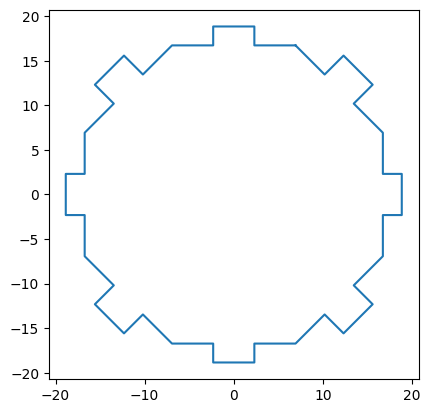

In [1]:
import parse_data.preprocess as preprocess
import parse_data.loading as loading
from analysis.response_times import calculate_response_times, plot_response_times
import globals
from plotting import plot_octagon
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# paths
data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# json_filename = r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json'


In [3]:
# Load JSON file into pandas df with collapsed data dictionary and adjustments based on date of recording 
df = loading.loading_pipeline(data_folder, json_filename)

Data is from period before 2024-09-13 11:31:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.


In [4]:
# Pre-process data 
df = preprocess.standard_preprocessing(df)

Preprocessing complete.


In [5]:
## Extract single trials ##

In [ ]:
## get individual dataframes for each trial and remove the first (and last trial if it was unfinished)

# create a list of dataframes separated from the original by the values in data.trialNum
# groupby produces an interable of tuples with the group key and the dataframe 
trials_list = [data for _, data in df.groupby('data.trialNum')]
# exclude trial 0 (could also exclude trial 1)
trials_list = trials_list[1:]
# if final trial does not contain a server selected trigger activation, discard it
if not globals.SELECTED_TRIGGER_ACTIVATION in trials_list[-1]['eventDescription'].unique():
    trials_list = trials_list[:-1]

In [6]:
def split_session_by_trial(df):
    
    # groupby produces an interable of tuples with the group key and the dataframe 
    trials_list = [data for _, data in df.groupby('data.trialNum')]
    
    # exclude trial 0 (could also exclude trial 1)
    trials_list = trials_list[1:]

    # if final  trial does not contain a server selected trigger activation, discard it
    if not globals.SELECTED_TRIGGER_ACTIVATION in trials_list[-1]['eventDescription'].unique():
        trials_list = trials_list[:-1]

    return trials_list


In [8]:
trials_list = split_session_by_trial(df)

In [10]:
this_trial = trials_list[trial_idx]

In [46]:
# clean this up. Probably a better way to get a float out of this

this_trial = trials_list[trial_idx]
# find the row representing trigger activation
trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
trigger_idx = trigger_event.index[0]
# normalise the trigger index to the starting index of this trial
trigger_idx = int(trigger_idx - this_trial.index[0])


In [12]:
x_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.x'].values

In [13]:
# get a trajectory from a trial
# only up to the index of the trigger
x_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.x'].values[:trigger_idx]
y_coords_p1 = trials_list[trial_idx]['data.playerPosition.0.location.z'].values[:trigger_idx]

x_coords_p2 = trials_list[trial_idx]['data.playerPosition.1.location.x'].values[:trigger_idx]
y_coords_p2 = trials_list[trial_idx]['data.playerPosition.1.location.z'].values[:trigger_idx]

In [48]:
coordinate_array_labels = ['0.location.x', '0.location.y', '1.location.x', '1.location.y']
coordinate_arrays = [this_trial[f'data.playerPosition.{label}'].values[:trigger_idx] for label in coordinate_array_labels]

In [14]:
len(x_coords_p2)

249

In [15]:
this_trial.shape[0]

448

In [33]:
# find trigger activating client for this trial
trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
trigger_activating_client = trigger_event['data.triggerClient'].values[0]

In [26]:
cmap_winner = mpl.cm.spring 
cmap_loser = mpl.cm.summer
timestamps = np.arange(len(x_coords_p1))
min_val, max_val = min(timestamps), max(timestamps)
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)

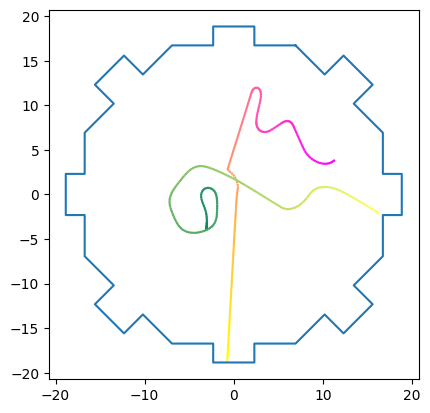

In [34]:
ax = plot_octagon.plot_octagon()
if trigger_activating_client == 0:
    cmaps = [cmap_winner, cmap_loser]
else:
    cmaps = [cmap_loser, cmap_winner]
ax.scatter(x_coords_p1, y_coords_p1, s=0.5, c=timestamps, cmap=cmaps[0], norm=norm)
ax.scatter(x_coords_p2, y_coords_p2, s=0.5, c=timestamps, cmap=cmaps[1], norm=norm)
plt.show()

In [51]:
def plot_trajectory(trials_list, trial_index=0, cmap_winner=mpl.cm.spring, cmap_loser=mpl.cm.summer,
                   s=0.5, social=False):
    # isolate trial
    this_trial = trials_list[trial_idx]

    # isolate trigger event
    trigger_event = this_trial[this_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]

    # find index of trigger event normalised to this trial
    trigger_idx = trigger_event.index[0]
    trigger_idx = int(trigger_idx - this_trial.index[0])

    end = 2
    if social:
        end = -1
    # extract position data for both players
    coordinate_array_labels = ['0.location.x', '0.location.y', '1.location.x', '1.location.y']
    coordinate_arrays = [this_trial[f'data.playerPosition.{label}'].values[:trigger_idx] for label in coordinate_array_labels[0:end]]
        
    
    # create colormap data
    
    